# Processamento/Tratamento de Dados

Nesta etapa do trabalho iremos tratar os dados coletados, realizando a tratativa dos valores ausentes, duplicados (caso exista)e ajuste do dataset para aplicação modelo ML.

As bibliotecas utilizadas nesta etapa foram:

In [ ]:
#### BIBLIOTECAS ####
import pandas as pd
import re
import pickle
import matplotlib.pyplot as plt
#!pip install seaborn
import seaborn as sns

from unicodedata import normalize
from matplotlib import pyplot as plt
from plotnine import *

%matplotlib inline
%load_ext google.colab.data_table
#!pip install plotly

Criamos algumas funções que serão utilizadas com frequencia nesta etapa do processo, sendo elas:

*   A função "**trata_texto**" é utilizada para retirar caracteres especiais e manter todo o campo em maiúsculo;
*   A função "**trata_nome_paises**" é utilizada para unificar a nomenclatura dos países, essa função será modificada nas futuras etapas para conter as diferenciações encontradas no decorrer da análise.
*   A função "**comprimir_arquivo**" É utilizada para comprimir os datasets finais no formato pickle para ganhar agilidade no carregamento do dataset no momento da aplicação do modelo ML.
*   A função "**carregar_arquivo**" É utilizada para carregar os datasets armazenados em pickle para dataframe.




In [ ]:
#### FUNÇÕES #####
def trata_texto(texto):
    tratado = normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII')
    return re.search('[^0-9]+', tratado).group(0).strip().upper()
  
def trata_nome_paises(dataset,campo):
    dataset.loc[dataset.Country == 'BAHAMAS',campo] = 'THE BAHAMAS'
    dataset.loc[dataset.Country == 'BRUNEI DARUSSALAM',campo] = 'BRUNEI'
    dataset.loc[dataset.Country == 'CABO VERDE',campo] = 'CAPE VERDE'
    dataset.loc[dataset.Country == 'CZECHIA',campo] = 'CZECH REPUBLIC'
    dataset.loc[dataset.Country == 'REPUBLIC OF MOLDOVA',campo] = 'MOLDOVA'
    dataset.loc[dataset.Country == 'SYRIAN ARAB REPUBLIC',campo] = 'SYRIA'
    dataset.loc[dataset.Country == 'THE FORMER YUGOSLAV REPUBLIC OF MACEDONIA',campo] = 'MACEDONIA'
    dataset.loc[dataset.Country == 'UKRAINE(D)',campo] = 'UKRAINE'
    dataset.loc[dataset.Country == 'UNITED STATES OF AMERICA',campo] = 'UNITED STATES'
    dataset.loc[dataset.Country == 'VENEZUELA (BOLIVARIAN REPUBLIC OF)',campo] = 'VENEZUELA'
    dataset.loc[dataset.Country == 'RUSSIA',campo] = 'RUSSIAN FEDERATION'
    dataset.loc[dataset.Country == 'CONGO [DRC]',campo] = 'DEMOCRATIC REPUBLIC OF THE CONGO'
    dataset.loc[dataset.Country == 'CONGO [REPUBLIC]',campo] = 'CONGO'
    dataset.loc[dataset.Country == 'PALESTINIAN TERRITORIES',campo] = 'PALESTINE'
    dataset.loc[dataset.Country == 'MACEDONIA [FYROM]',campo] = 'MACEDONIA'
    dataset.loc[dataset.Country == 'GAMBIA',campo] = 'THE GAMBIA'
    dataset.loc[dataset.Country == 'MYANMAR [BURMA]',campo] = 'MYANMAR'
    dataset.loc[dataset.Country == 'U.S. VIRGIN ISLANDS',campo] = 'VIRGIN ISLANDS, U.S.'
    dataset.loc[dataset.Country == 'MICRONESIA',campo] = 'FEDERATED STATES OF MICRONESIA'
    dataset.loc[dataset.Country == "C?TE D'IVOIRE",campo] = "COTE D'IVOIRE"
    dataset.loc[dataset.Country == "GUINEA BISSAU",campo] = "GUINEA-BISSAU"
    dataset.loc[dataset.Country == "TIMOR LESTE",campo] = "TIMOR-LESTE"
    dataset.loc[dataset.Country == "CONGO (DEMOCRATIC REPUBLIC OF THE)",campo] = "DEMOCRATIC REPUBLIC OF THE CONGO"
    dataset.loc[dataset.Country == "PALESTINA",campo] = "PALESTINE"
    dataset.loc[dataset.Country == "VIRGIN ISLANDS",campo] = "VIRGIN ISLANDS, U.S."
    
    return dataset

def comprimir_arquivo(dataset,path,filename):
  dataset.to_pickle(path+filename+'.pkl')
  dataset.to_csv(path+filename+'.csv',sep=',',encoding='utf-8',index=False)
  #dataset.to_excel(path+filename+'.xlsx')
  
def carregar_arquivo(path,filename):
  dataset = pickle.load( open(path+filename+'.pkl', "rb" ) )
  return dataset

Realiza a conexão com o **Google Drive** para carregar os dataset armazenados em nosso repositório. (Datasets apresentados na etapa de [coleta](https://drive.google.com/file/d/1GgD1rde7BHrdsP-KwYz4s3ZVluw9iaCd/view?usp=sharing))

In [ ]:
# Montagem do drive
from google.colab import drive
drive.mount('/content/maejemison', force_remount=True)

path = '/content/maejemison/My Drive/TCC_PUC/02.analise_exploratoria/'

Mounted at /content/maejemison


Neste trecho do código realizamos a conexão com ***BigQuery*** e importamos os dados até o momento coletados.

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')
project_id = 'maejemison'

Authenticated


In [ ]:
#################
## DATA IMPORT ##
#################

#Qualidade dos dados WHO
who_data_quality = pd.read_excel(path+'data/Country_Data_Quality_WHO.xlsx', 
                  encoding='utf-8', 
                  na_values='-',
                  names=['Country','Year','Average_Usuability','Completeness','Completeness_end',
                         'Garbage_frac','Garbage_frac_end','Notes'])

who_data_quality = who_data_quality.sort_values(by='Country')
who_data_quality.drop('Notes', axis=1, inplace=True)

#Dados do IHME
ihme_data = pd.read_csv(path+'data/IHME-GBD_2017_DATA-a27917f2/IHME-GBD_2017_DATA-a27917f2.csv', 
                  skiprows=1, 
                  sep=',', 
                  encoding='utf-8', 
                  na_values='-', 
                  engine='python',
                  names=['Metric','Country','Sex','Age','Cause_of_Death','Rate','Year',
                         'Total','Upper','Lower'])

#Dados do WHO
who_data = pd.read_csv(path+'data/WHO_SDGSUICIDE.csv', 
                  skiprows=2,
                  sep=',', 
                  encoding='utf-8', 
                  na_values='-', 
                  engine='python',
                  names=['Country','Year','DC','Male_DC','Female_DC',
                         'SU','Male_SU','Female_SU'])

#Dataset de localização
#Origem: http://ghdx.healthdata.org/sites/default/files/ihme_query_tool/IHME_GBD_2017_CODEBOOK.zip
location_details = pd.read_excel(path+'data/IHME_GBD_2017_ALL_LOCATIONS_HIERARCHIES_Y2018M11D18.XLSX',
                  encoding='utf-8',
                  na_values='-')
location_details = location_details[(location_details['location_set_version_id'] == 423)]

#Origem: https://creativecommons.org/licenses/by/4.0/.
cities_data = pd.read_csv(path+'data/simplemaps_worldcities_basicv1.5/worldcities.csv', 
                  skiprows=1, 
                  sep=',', 
                  encoding='utf-8', 
                  na_values='-', 
                  engine='python',
                  names=['City_','City','latitude','longitude','Country','Country_id_','Country_id',
                         'highest_level','capital','population','id'])

#Origem: https://www.kaggle.com/eidanch/counties-geographic-coordinates
coutries_data = pd.read_csv(path+'data/countries.csv', 
                  skiprows=0, 
                  sep=',', 
                  encoding='utf-8',
                  names=['Country_id','latitude','longtude','Country'])

#Origem: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data#GlobalLandTemperaturesByCountry.csv
global_land_temp_by_country = pd.read_csv(path+'data/GlobalLandTemperaturesByCountry.csv', 
                  skiprows=1,
                  sep=',', 
                  encoding='utf-8',
                  index_col=False,
                  names=['Date','avg_temp','AverageTemperatureUncertainty','Country'])

Removemos as colunas que não iremos utilizar

In [ ]:
global_land_temp_by_country = global_land_temp_by_country.drop(['AverageTemperatureUncertainty'], axis = 1)

No dataset "**global_land_temp_by_country**" a data está completa (YYYY-MM-DD), porém precisamos apenas do dado do ano para cruzar com nosso dataset, desta forma extraímos o ano e criamos uma nova coluna chamada "**Year**"

In [ ]:
global_land_temp_by_country['Year'] = pd.DatetimeIndex(global_land_temp_by_country['Date']).year
global_land_temp_by_country = global_land_temp_by_country.drop('Date', axis = 1)

Algumas colunas foram criadas para auxílio do merge entre os datasets e não serão utilizadas futuramente, desta forma apagamos as informações que neste momento não são importantes para o nosso modelo.

In [ ]:
drop_elements = ['highest_level','id','City_','Country_id_','capital']
cities_data = cities_data.drop(drop_elements, axis = 1)

Aplicamos a tratativa dos nomes dos países nos datasets **cities_data** para possibilitar realizar o merge dos datasets de forma equivalente.

In [ ]:
cities_data.Country = cities_data.Country.apply(trata_texto)
cities_data.City = cities_data.City.apply(trata_texto)

Filtramos e agrupamos os dados do dataset **global_land_temp_by_country** da seguinte forma:


*   Apenas temperaturas após o ano de 1990 serão consideradas, pois o dataset do IHME (ao qual faremos o merge) contém dados após esta data;
*   Agrupamos por ano/País os dados de temperatura para possibilitar o merge entre os datasets. (Este conjunto de dados será utilizado futuramente para completar os dados de temperatura que faltam do dataset obtido pela base do **BigQuery**)



In [ ]:
#Filtra apenas os dados necessários
global_land_temp_by_country = global_land_temp_by_country[global_land_temp_by_country['Year'] >= 1990]
global_land_temp_by_country = global_land_temp_by_country.groupby(['Country', 'Year'],as_index=False).mean().round(2)

O conjunto de dados principal que utilizaremos para obter os dados de temperatura são de origem do [BigQuery](https://bigquery.cloud.google.com/table/fh-bigquery:weather_gsod.all?pli=1): 

In [ ]:
#Origem: https://bigquery.cloud.google.com/table/fh-bigquery:weather_gsod.all?pli=1
global_temp_by_country_data = pd.io.gbq.read_gbq('''
  SELECT year as year_
		,country as Country_id          
        ,ROUND(((AVG(temp) - 32)*5/9),0) as avg_temp
  FROM `fh-bigquery.weather_gsod.all`
  GROUP BY year,country
  ''', project_id=project_id, dialect='standard')

global_temp_by_city_data = pd.io.gbq.read_gbq('''
  SELECT year as year_
        ,ROUND(((AVG(temp) - 32)*5/9),0) as avg_temp
        ,country as Country_Code
        ,name as City
  FROM `fh-bigquery.weather_gsod.all`
  GROUP BY year,country,name
  ''', project_id=project_id, dialect='standard')

O conjunto de dados do IMGE contém informações importantes para tratarmos a hierarquia de países, desta forma realizamos o merge com o dataset ihme_data para agrupar essas informações.

In [ ]:
ihme_data = pd.merge(ihme_data,location_details,left_on='Country', right_on='location_name')

Criamos o campo "cat_level" qe recebe uma melhor descrição sobre a categoria da localização e apagamos as colunas não mais necessárias:

In [ ]:
#Campo mais descritivo como categoria
ihme_data['cat_level'] = ihme_data.level.apply(lambda x: ["Global","Hemisphere", "Geo Region","Country"
                                                          ,"City","Downton"][x]).astype("category")

drop_elements = ['Metric','Rate','location_set_version_id','location_name','sort_order']
ihme_data = ihme_data.drop(drop_elements, axis = 1)

ihme_data.head()

,Country,Sex,Age,Cause_of_Death,Year,Total,Upper,Lower,location_id,parent_id,level,cat_level
0,North Korea,Male,10 to 14,Self-harm by other specified means,1990,1.774425,2.947398,0.958434,7,5,3,Country
1,North Korea,Female,10 to 14,Self-harm by other specified means,1990,1.823343,2.833172,1.116837,7,5,3,Country
2,North Korea,Both,10 to 14,Self-harm by other specified means,1990,1.799415,2.492644,1.260285,7,5,3,Country
3,North Korea,Male,15 to 19,Self-harm by other specified means,1990,10.311975,15.737132,6.160063,7,5,3,Country
4,North Korea,Female,15 to 19,Self-harm by other specified means,1990,8.511354,12.099155,5.659759,7,5,3,Country


Criamos um **Dataframe** "metricas_globais" filtrando os dados de métricas de suicídio globais, para uso futuro.

In [ ]:
#Métricas globais
metricas_globais = ihme_data[
          (ihme_data['Country'] == 'Global') 
          &(ihme_data['Sex'] == 'Both')
          & (ihme_data['Age'] == 'All Ages')
          & (ihme_data['Cause_of_Death'] == 'Self-harm')
          ].sort_values(by="Total", ascending=False)

mean_global_suicide = metricas_globais['Total'].mean()
print('Media global de rate de suicidio: ',mean_global_suicide)

Media global de rate de suicidio:  12.551622825178459


Neste dataset iremos transpor as colunas de "Country" e "Geo Region" para os registros de cidades e países, esta transposição foi feita pelo "parent_id" como chave para a identificação do país/região.

In [ ]:
####### AJUSTES GERAIS ##########

#Separa os registros de cidades (c) e regiões (r) 
c = ihme_data[ihme_data['level'] == 3]
r = ihme_data[ihme_data['level'] == 2]

#Dicionarios contendo a lista de paises e região
c_dict = dict(zip(c['location_id'], c['Country'].values.tolist()))
r_dict = dict(zip(r['location_id'], r['Country'].values.tolist()))

#Transposição das cidades
ihme_data['Country_'] = ihme_data['parent_id'].map(c_dict) 
ihme_data['Geo_Region'] = ihme_data['parent_id'].map(r_dict) 

#Transposição da região
r_dict = dict(zip(ihme_data['Country'], ihme_data['Geo_Region'].values.tolist()))
ihme_data['Geo_Region'] = ihme_data['Country_'].map(r_dict) 

Criamos um dataset para cada uma das análises: 



*   Cidade;
*   País.



In [ ]:
ihme_data_city = ihme_data[ihme_data['level'] == 4]
ihme_data_country = ihme_data[ihme_data['level'] == 3]

Neste momento apagamos algumas colunas que utilizamos temporariamente para o processamento das informações e merge da mesma, pois não iremos utilizar no decorrer das próximas etapas

In [ ]:
#Apaga colunas que nao serao utilizadas
drop_elements = ['location_id','parent_id','level','cat_level']
ihme_data_city = ihme_data_city.drop(drop_elements, axis = 1)

drop_elements = ['location_id','parent_id','Country_','Geo_Region','level','cat_level']
ihme_data_country = ihme_data_country.drop(drop_elements, axis = 1)

O código abeixo irá renomear as colunas e trata o nome dos países no dataset **ihme_data_city**

In [ ]:
#Ajusta o nome das colunas
ihme_data_city.rename(columns={"Country": "City", "Country_": "Country"}, inplace = True)
ihme_data_city.City = ihme_data_city.City.apply(trata_texto)

Utilizamos a função "**trata_texto**" e "**trata_nome_paises**" no nome dos países que serão trabalhados adiante.

In [ ]:
#Ajusta nome dos paises
ihme_data_country.Country = ihme_data_country.Country.apply(trata_texto)
ihme_data_city.Country = ihme_data_city.Country.apply(trata_texto)
ihme_data_city.City = ihme_data_city.City.apply(trata_texto)
who_data_quality.Country = who_data_quality.Country.apply(trata_texto)
coutries_data.Country = coutries_data.Country.apply(trata_texto)
global_land_temp_by_country.Country = global_land_temp_by_country.Country.apply(trata_texto)

#Trata nome dos paises
coutries_data = trata_nome_paises(coutries_data,'Country')
ihme_data_country = trata_nome_paises(ihme_data_country,'Country')
who_data_quality = trata_nome_paises(who_data_quality,'Country')
global_land_temp_by_country = trata_nome_paises(global_land_temp_by_country,'Country')

Realiza o merge entre os datasets:



*   Dados complementáres de países
*   Dados complementáres de cidades



In [ ]:
####### COUNTRY LAT. LONG ##########

#Merge dos datasets
ihme_data_country = pd.merge(ihme_data_country,coutries_data,left_on='Country', right_on='Country', how='left')
ihme_data_worldcities_basic = pd.merge(ihme_data,cities_data,left_on='Country', right_on='City', how='left')

Os países **NAMÍBIA, SUL DO SUDÃO E SÃO TOMÉ E PRINCÍPIO** necessitaram de ajustes pontuais no dataset, pois não continham a informação em *`coutries_data`*.

In [ ]:
#Atualiza país sem cadastro
ihme_data_country.loc[ihme_data_country.Country == 'NAMIBIA','Country_id'] = 'NAM'

#Atualize países sem informação de lat. e long.
ihme_data_country.loc[ihme_data_country.Country == 'SOUTH SUDAN','Country_id'] = 'SS'
ihme_data_country.loc[ihme_data_country.Country == 'SOUTH SUDAN','latitude'] = 19.6174500
ihme_data_country.loc[ihme_data_country.Country == 'SOUTH SUDAN','longtude'] = 37.2164400

ihme_data_country.loc[ihme_data_country.Country == 'SAO TOME AND PRINCIPE','Country_id'] = 'ST'
ihme_data_country.loc[ihme_data_country.Country == 'SAO TOME AND PRINCIPE','latitude'] = 0.3365400
ihme_data_country.loc[ihme_data_country.Country == 'SAO TOME AND PRINCIPE','longtude'] = 6.7273200

Os dados **duplicados** foram removidos do dataset:



1.   Informação de Sexo (Ambos);
2.   Informação de Idade (Todas);
3.   Causa de Morte (Suicídio - sem informação de método);
4.   Dados de Geolocalização (Level igual a 5)



In [ ]:
#Remove dados duplicados no dataset
ihme_data = ihme_data[ihme_data["Sex"] != 'Both']
ihme_data = ihme_data[ihme_data['Age'] != 'All Ages']
ihme_data = ihme_data[ihme_data["Cause_of_Death"] != 'Self-harm']
ihme_data = ihme_data[ihme_data["level"] != 5]

Realizamos também o merge do dataset para obter as informações de temperatura média (`global_temp_by_country_data`), desta forma agrupamos o dataframe por **ano** e depois realizamos o merge entre os datasets (`ihme_data_city` e `ihme_data_country`)

In [ ]:
global_temp_by_country_data['year_'] = pd.to_numeric(global_temp_by_country_data['year_'])
global_temp_by_city_data['year_'] = pd.to_numeric(global_temp_by_city_data['year_'])

ihme_data_city = pd.merge(ihme_data_city,global_temp_by_city_data,left_on=['City','Year'], right_on=['City','year_'], how='left')

#Neste merge utilizamos os dados obtidos pelo BigQuery e também pelo dataset global_land_temp_by_country
ihme_data_country = pd.merge(ihme_data_country,global_temp_by_country_data,left_on=['Country_id','Year'], right_on=['Country_id','year_'], how='left')
ihme_data_country = pd.merge(ihme_data_country,global_land_temp_by_country,left_on=['Country','Year','avg_temp'], right_on=['Country','Year','avg_temp'], how='left')

Os países com dados NAN (faltantes) são carregados com o valor médio de temperatura do país (`global_land_temp_by_country`) esta tratativa foi necessária, pois 276.480 registros não continham dados de temperatura.

In [ ]:
ihme_data_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790272 entries, 0 to 790271
Data columns (total 13 columns):
Country           790272 non-null object
Sex               790272 non-null object
Age               790272 non-null object
Cause_of_Death    790272 non-null object
Year              790272 non-null int64
Total             790272 non-null float64
Upper             790272 non-null float64
Lower             790272 non-null float64
Country_id        790272 non-null object
latitude          790272 non-null object
longtude          790272 non-null object
year_             513792 non-null float64
avg_temp          513792 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 84.4+ MB


In [ ]:
####### TRATA DADOS NAN #######

gc = global_land_temp_by_country.groupby(['Country'],as_index=False).mean().round(2)
gc = gc.drop(['Year'], axis=1)

df = ihme_data_country

#Países existente - Itera sobre os itens NAN e substitui pelo valor médio do mesmo
for index, row in gc.iterrows():
  df.loc[df.Country== row['Country'],'avg_temp'] = df.loc[df.Country== row['Country'],'avg_temp'].fillna(gc[gc['Country'] == row['Country']]['avg_temp'].mean())

df = df.fillna(gc.avg_temp.mean())
  
ihme_data_country = df

In [ ]:
#Apaga colunas que nao serao utilizadas
drop_elements = ['year_']
ihme_data_city = ihme_data_city.drop(drop_elements, axis = 1)
ihme_data_country = ihme_data_country.drop(drop_elements, axis = 1)

In [ ]:
ihme_data_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790272 entries, 0 to 790271
Data columns (total 12 columns):
Country           790272 non-null object
Sex               790272 non-null object
Age               790272 non-null object
Cause_of_Death    790272 non-null object
Year              790272 non-null int64
Total             790272 non-null float64
Upper             790272 non-null float64
Lower             790272 non-null float64
Country_id        790272 non-null object
latitude          790272 non-null object
longtude          790272 non-null object
avg_temp          790272 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 78.4+ MB


Criamos um array com o nome dos países considerados confiáveis para utilização em filtros futuros 

In [ ]:
#Paises com dados considerados completos superior a 70% 
#e com taxa de dados incompletos ou incorretos menor que 25%
countries_data_quality = who_data_quality[(who_data_quality['Completeness'] > 0.70) 
                                                 & (who_data_quality['Garbage_frac_end'] <= 0.25)
                                            ].Country.unique()

print("Total de Paises com dados confiaveis:", countries_data_quality)

Total de Paises com dados confiaveis: ['ANTIGUA AND BARBUDA' 'ARGENTINA' 'ARMENIA' 'AUSTRALIA' 'AUSTRIA'
 'THE BAHAMAS' 'BARBADOS' 'BELARUS' 'BELGIUM' 'BELIZE'
 'BOSNIA AND HERZEGOVINA' 'BRAZIL' 'BRUNEI' 'CAPE VERDE' 'CHILE'
 'COSTA RICA' 'CROATIA' 'CUBA' 'CZECH REPUBLIC' 'DENMARK' 'ECUADOR'
 'ESTONIA' 'FINLAND' 'FRANCE' 'GERMANY' 'GRENADA' 'GUATEMALA' 'GUYANA'
 'HUNGARY' 'ICELAND' 'IRELAND' 'ISRAEL' 'ITALY' 'JAMAICA' 'JAPAN'
 'KAZAKHSTAN' 'KYRGYZSTAN' 'LATVIA' 'LITHUANIA' 'LUXEMBOURG' 'MALTA'
 'MAURITIUS' 'MEXICO' 'NETHERLANDS' 'NEW ZEALAND' 'NORWAY' 'PANAMA'
 'PHILIPPINES' 'PORTUGAL' 'REPUBLIC OF KOREA' 'MOLDOVA'
 'RUSSIAN FEDERATION' 'SAINT VINCENT AND THE GRENADINES' 'SERBIA'
 'SLOVAKIA' 'SLOVENIA' 'SPAIN' 'SWEDEN' 'SWITZERLAND' 'TAJIKISTAN'
 'MACEDONIA' 'TRINIDAD AND TOBAGO' 'TURKMENISTAN' 'UKRAINE'
 'UNITED KINGDOM' 'UNITED STATES' 'URUGUAY' 'UZBEKISTAN' 'VENEZUELA']


### Dataset proposto (Cidades):

In [ ]:
#Proposta do dataSet
ihme_data_city[(ihme_data_city['Sex'] == 'Male') 
               & (ihme_data_city['Age'] == '10 to 14') 
               #& (ihme_data_city['City'] == 'BRAZIL') 
               & (ihme_data_city['Year'] == 2007)
               & (ihme_data_city['avg_temp'].notnull())].tail(3)

,City,Sex,Age,Cause_of_Death,Year,Total,Upper,Lower,Country,Geo_Region,avg_temp,Country_Code
796752,OSAKA,Male,10 to 14,Self-harm,2007,1.087473,1.397242,0.835239,JAPAN,High-income Asia Pacific,18.0,JA
796800,OSAKA,Male,10 to 14,Self-harm by firearm,2007,0.010182,0.017303,0.005246,JAPAN,High-income Asia Pacific,18.0,JA
796848,OSAKA,Male,10 to 14,Self-harm by other specified means,2007,1.077291,1.383158,0.829185,JAPAN,High-income Asia Pacific,18.0,JA


### Dataset proposto (Países)

In [ ]:
#Proposta do dataSet
ihme_data_country[(ihme_data_country['Sex'] == 'Male') 
                  & (ihme_data_country['Age'] == '10 to 14') 
                  & (ihme_data_country['Country'] == 'BRAZIL') 
                  & (ihme_data_country['Year'] == 2007)]

,Country,Sex,Age,Cause_of_Death,Year,Total,Upper,Lower,Country_id,latitude,longtude,avg_temp
171792,BRAZIL,Male,10 to 14,Self-harm,2007,0.799236,0.873730,0.720528,BR,-14.235004,-51.92528,25.0
171840,BRAZIL,Male,10 to 14,Self-harm by firearm,2007,0.094511,0.147046,0.060532,BR,-14.235004,-51.92528,25.0
171888,BRAZIL,Male,10 to 14,Self-harm by other specified means,2007,0.704725,0.779996,0.619551,BR,-14.235004,-51.92528,25.0


Carregamos os resultados nos formatos em **.pickle** e **.csv** para utilização do modelo de Machine Learning e na fase de visualização no **Tableu Public**.

In [ ]:
#########################
## COMPRIMIR ARQUIVOS  ##
#########################

comprimir_arquivo(ihme_data,path+'data/','IHGE_data')
comprimir_arquivo(who_data_quality,path+'data/','WHO_QLT_data')
comprimir_arquivo(who_data,path+'data/','WHO_data')
comprimir_arquivo(ihme_data_city,path+'data/','IHGE_CITY_data')
comprimir_arquivo(ihme_data_country,path+'data/','IHGE_COUNTRY_data')
comprimir_arquivo(metricas_globais,path+'data/','METRICAS_GLOBAIS_data')
comprimir_arquivo(global_temp_by_country_data,path+'data/','GSOD_WEATHER_COUNTRY_data')
comprimir_arquivo(global_temp_by_city_data,path+'data/','GSOD_WEATHER_CITY_data')

In [ ]:
#########################
##  CARREGA ARQUIVOS   ##
#########################

%%timeit
ihme_data = carregar_arquivo(path+'data/','IHGE_data') #1.778.112 registros
who_data_quality = carregar_arquivo(path+'data/','WHO_QLT_data') #111 registros, sem valores nulos
who_data = carregar_arquivo(path+'data/','WHO_data') #915 registros, sem valores nulos
ihme_data_city = carregar_arquivo(path+'data/','IHGE_CITY_data') #1.778.112 registros
ihme_data_country = carregar_arquivo(path+'data/','IHGE_COUNTRY_data') #1.778.112 registros 
metricas_globais = carregar_arquivo(path+'data/','METRICAS_GLOBAIS_data') # 28 registros sem nulos

1 loop, best of 3: 1.31 s per loop


# Análise e Exploração dos Dados

Nesta etapa avaliamos um pouco dos dados que encontran-se nos datasets `ihme_data_city` e  `ihme_data_country`, como podemos ver no resultado abaixo, os dados de cidade existem apenas para os paíse: **INDONÉSIA, ESTADOS UNIDOS, JAPÃO, MÉXICO, BRASIL, REINO UNIDO, SUÉCIA**

Já no dataset `ihme_data_country` todos os países contém dados de temperatura, desta forma será nosso principal dataset de análise.

In [ ]:
print('Cidades com valor médio de temperatura ',ihme_data_city[ihme_data_city['City'].notnull()].Country.unique())

print('Paises com valor médio de temperatura ',ihme_data_country[ihme_data_country['avg_temp'].notnull()].Country.unique().size)
print('Paises sem valor médio de temperatura ',ihme_data_country[ihme_data_country['avg_temp'].isnull()].Country.unique().size)

Cidades com valor médio de temperatura  ['INDONESIA' 'UNITED STATES' 'JAPAN' 'MEXICO' 'BRAZIL' 'UNITED KINGDOM'
 'SWEDEN']
Paises com valor médio de temperatura  195
Paises sem valor médio de temperatura  0


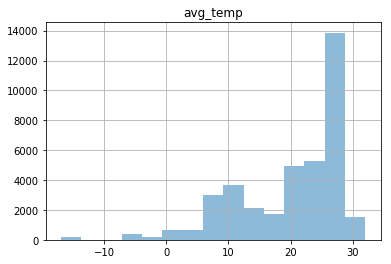

In [ ]:
p = ihme_data_country[(ihme_data_country['Age'] != 'All Ages') 
                 & (ihme_data_country['Cause_of_Death'] == 'Self-harm') 
                 & (ihme_data_country['Sex'] == 'Both')
                 & (ihme_data_country['Year'] >= 2005)].hist(bins=15, alpha=0.5, column="avg_temp")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3545da6208>]],
      dtype=object)

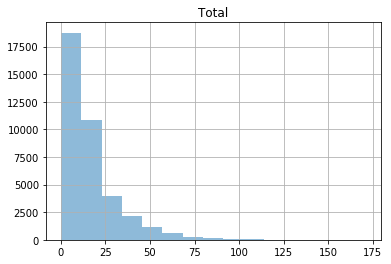

In [ ]:
ihme_data_country[(ihme_data_country['Age'] != 'All Ages') 
                 & (ihme_data_country['Cause_of_Death'] == 'Self-harm') 
                 & (ihme_data_country['Sex'] == 'Both')
                 & (ihme_data_country['Year'] >= 2005)].hist(bins=15, alpha=0.5, column="Total")

## 1. Países/Estados com maior taxa de suicídio

Ordenamos o dataset do IHGE pelos 10 paises com maior taxa de suícídio no último ano (2017),  nesta consulta condideramos todos os Países com dados sobre suicídio confiáveis, de ambos os sexos e de todas as idades.

Ordenamos o resultado pela maior taxa de suicídio.

In [ ]:
## 1. Países/Estados com maior Rate de suicídio
paises_com_maior_rate = ihme_data_country[
          (ihme_data_country['Country'].isin(countries_data_quality)) 
          & (ihme_data_country['Sex'] == 'Both')
          & (ihme_data_country['Year'] >= 2017)
          & (ihme_data_country['Age'] == 'All Ages')
          & (ihme_data_country['Cause_of_Death'] == 'Self-harm')
                                                  ].sort_values(by="Total", ascending=False)

paises_com_maior_rate.head(10)

,Country,Sex,Age,Cause_of_Death,Year,Total,Upper,Lower,Country_id,latitude,longtude,avg_temp
165215,LITHUANIA,Both,All Ages,Self-harm,2017,36.265684,39.102158,33.581359,LT,55.169438,23.881275,17.00
302303,UKRAINE,Both,All Ages,Self-harm,2017,30.609601,33.734859,28.136898,UA,48.379433,31.16558,8.91
407135,RUSSIAN FEDERATION,Both,All Ages,Self-harm,2017,30.027721,30.872981,28.977562,RU,61.52401,105.318756,-4.16
298127,GUYANA,Both,All Ages,Self-harm,2017,25.520233,29.067222,22.010321,GY,4.860416,-58.93018,28.00
20063,BELARUS,Both,All Ages,Self-harm,2017,24.833589,27.678957,22.293826,BY,53.709807,27.953389,26.00
221663,KAZAKHSTAN,Both,All Ages,Self-harm,2017,23.808193,26.152183,21.877539,KZ,48.019573,66.923684,7.00
141023,LATVIA,Both,All Ages,Self-harm,2017,22.513890,25.580098,19.715741,LV,56.879635,24.603189,6.59
11999,JAPAN,Both,All Ages,Self-harm,2017,22.450767,23.638844,21.492891,JP,36.204824,138.252924,12.82
713567,HUNGARY,Both,All Ages,Self-harm,2017,20.822610,22.283580,19.523446,HU,47.162494,19.503304,11.00
729695,SLOVENIA,Both,All Ages,Self-harm,2017,20.793951,22.587058,18.912356,SI,46.151241,14.995463,10.00


Como podemos avaliar na tabela acima, os principais países com maior taxa de suicídio no mundo são: **Lituania, Ucrânia, Russia, Guiana, Belarus, Cazaquistão, Letônia, Japão, Sri Lanka e Hungria.**

Para avaliar a diferença entre a classificação de países com dados confiáveis (classificação determinada pela WHO) e os demais paises, podemos constatar que a **Groelândia, Sul da Korea, Lesodo, Suriname e Kiribati** aparecem na lista com os maiores taxas mundiais:

In [ ]:
## 1. Países/Estados com maior Rate de suicídio desconsiderando lista de paises com dados confiáveis
paises_com_maior_rate_all = ihme_data_country[
          (ihme_data_country['Sex'] == 'Both')
          & (ihme_data_country['Year'] >= 2017)
          & (ihme_data_country['Age'] == 'All Ages')
          & (ihme_data_country['Cause_of_Death'] == 'Self-harm')
                                                  ].sort_values(by="Total", ascending=False)

paises_com_maior_rate_all.head(10)

,Country,Sex,Age,Cause_of_Death,Year,Total,Upper,Lower,Country_id,latitude,longtude,avg_temp
709535,GREENLAND,Both,All Ages,Self-harm,2017,57.611434,66.105039,52.313795,GL,71.706936,-42.604303,-5.00
165215,LITHUANIA,Both,All Ages,Self-harm,2017,36.265684,39.102158,33.581359,LT,55.169438,23.881275,17.00
302303,UKRAINE,Both,All Ages,Self-harm,2017,30.609601,33.734859,28.136898,UA,48.379433,31.16558,8.91
407135,RUSSIAN FEDERATION,Both,All Ages,Self-harm,2017,30.027721,30.872981,28.977562,RU,61.52401,105.318756,-4.16
76607,SOUTH KOREA,Both,All Ages,Self-harm,2017,28.911928,31.523744,26.420735,KR,35.907757,127.766922,28.00
28127,LESOTHO,Both,All Ages,Self-harm,2017,26.271734,33.075378,19.996356,LS,-29.609988,28.233608,11.00
294239,SURINAME,Both,All Ages,Self-harm,2017,25.684810,29.090051,22.370977,SR,3.919305,-56.027783,26.97
298127,GUYANA,Both,All Ages,Self-harm,2017,25.520233,29.067222,22.010321,GY,4.860416,-58.93018,28.00
471626,KIRIBATI,Both,All Ages,Self-harm,2017,25.171690,31.114543,19.133852,KI,-3.370417,-168.734039,27.40
20063,BELARUS,Both,All Ages,Self-harm,2017,24.833589,27.678957,22.293826,BY,53.709807,27.953389,26.00


Considerando **todos os países** do dataset, calculamos a média/desvio padrão de taxa de suicídio dos 10 primeiros paises do ranking, comparando a média amostral pelo desvio padrão podemos constatar que há uma dispersão representativa nos dados, isso representa que as taxas de suicídio entre esses países nos anos analisados (1990 a 2017) são dispersos, nos indicando algum aumento ou diminuição na taxa entre cada ano, podendo representar evento átipico no país ou até mesmo representar a má consistência/qualidade nos dados coletados.

In [ ]:
# Média e STD de cada Pais
ihme_data_country[
          (ihme_data_country['Sex'] == 'Both')
          & (ihme_data_country['Age'] == 'All Ages')
          & (ihme_data_country['Cause_of_Death'] == 'Self-harm')
          ].groupby("Country").agg(['mean', 'std']).Total.sort_values(by='mean',ascending=False).head(10)

,mean,std
Country,,
GREENLAND,77.895111,13.268468
RUSSIAN FEDERATION,42.668220,8.351363
LITHUANIA,42.552035,5.164575
BELARUS,34.452683,6.762973
LATVIA,31.150859,7.048008
UKRAINE,30.595605,4.522638
KAZAKHSTAN,30.222265,6.046006
HUNGARY,29.323576,6.133017
SRI LANKA,29.094898,6.794802


## 2. Países onde a taxa de suicídio feminino é maior do que o masculino

O público mais acometido por suícídio em relação a média mundial é o sexo masculino, desta forma em nosso trabalho também buscamos avaliar em relação ao sexo feminino quais países as taxas de suícídio entre mulheres era mais alta do que entre homens desde 2000 até 2017 e chegamos nos seguintes países: **Antígua e Barbuda, Bangladesh, China, Granada, Lesoto, Marrocos, Mianmar, Nigéria, Paquistão e Uganda.**

Sendo alguns paises com predominância da religião islâmica, opressão feminina e desigualdade de gênero.

In [ ]:
paises_taxa_feminino_maior_masc = who_data_quality[(
                                who_data_quality.Country.isin(
                                    who_data[(who_data['Female_SU'] > who_data['Male_SU']) 
                                    & (who_data['Year'] > 2000)].Country)) 
                                & (who_data_quality['Completeness'] > 0.70)]

paises_taxa_feminino_maior_masc

who_data[(who_data['Female_SU'] > who_data['Male_SU'])].Country.unique()

array(['Antigua and Barbuda', 'Bangladesh', 'China', 'Grenada', 'Lesotho',
       'Morocco', 'Myanmar', 'Nigeria', 'Pakistan', 'Uganda'],
      dtype=object)

## 3. Países com maiores taxas de suicídio feminino

Buscamos identificar quais paises a taxa de suicídio feminino é maior que a taxa de suicídio mundial (12,5) e encontramos os seguintes países: **Japão, Bielorrússia, Estônia, Cuba, Sri Lanka, Suíça, Letônia, Lituânia, Cazaquistão, África do Sul, Ucrânia, Ucrânia, Suécia, Bulgária, Sérvia, Federação Russa, Croácia, Finlândia, Áustria, Dinamarca, Dinamarca, Bélgica, Dinamarca**

Sendo a maioria destes países pertencentes aos continentes Asiático e Africano.

In [ ]:
paises_com_alto_SU_feminino = ihme_data_country[(ihme_data_country['Sex'] == 'Female') 
                                        & (ihme_data_country['Total'] > mean_global_suicide)
                                        & (ihme_data_country['Age'] == 'All Ages') 
                                        & (ihme_data_country['Cause_of_Death'] == 'Self-harm')
                                        & (ihme_data_country['Country'].isin(countries_data_quality))
                                       ]

paises_com_alto_SU_feminino.Country.unique()

array(['JAPAN', 'BELARUS', 'ESTONIA', 'CUBA', 'SWITZERLAND', 'LATVIA',
       'LITHUANIA', 'KAZAKHSTAN', 'UKRAINE', 'SWEDEN', 'SERBIA',
       'RUSSIAN FEDERATION', 'CROATIA', 'FINLAND', 'AUSTRIA', 'DENMARK',
       'FRANCE', 'BELGIUM', 'HUNGARY', 'SLOVENIA'], dtype=object)

## 4. Faixa etária com maior desvio padrão referente a taxa de suícidio

Dentre as faixas etárias obtidas no dataset de origem (IHGE), levantamos o desvio padrão da taxa de mortalidade por suicídio em todos o mundo e como podemos avaliar a idade onde há ocorrência maior de suicídio está entre os **idosos.**

In [ ]:
print("###### Idades - Desvio Padrão #####")
print(ihme_data_country[(ihme_data_country['Age'] != 'All Ages') & (ihme_data_country['Cause_of_Death'] == 'Self-harm') & (ihme_data_country['Sex'] == 'Both')
                & (ihme_data_country['Country'].isin(countries_data_quality))]
      [['Age','Total']].groupby(['Age'], as_index=True).std())
#.plot.bar()

###### Idades - Desvio Padrão #####
              Total
Age                
10 to 14   1.021562
15 to 19   5.042456
20 to 24   8.720379
25 to 29  10.257986
30 to 34  11.502541
35 to 39  12.810013
40 to 44  14.544425
45 to 49  16.032684
50 to 54  16.636293
55 to 59  15.465810
60 to 64  12.853309
65 to 69  12.393282
70 to 74  13.043496
75 to 79  14.868889
80 plus   20.024698


## 5. Países com maior taxa de suício entre os jovens

O suicídio entre os jovens é um assunto muito importante e que merece grande atenção, com este objetivo listamos a baixo os paises com maior número de suicídio entre os jovens (15 a 24 anos) dentre os países com dados considerádos confiáveis pela instituição WHO.

Temos a Russia e o Cazaquistão entre os primeiros lugares. 

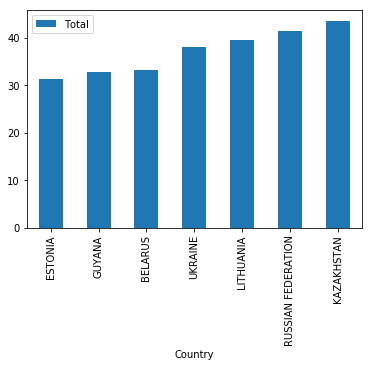

In [ ]:
rates_alto_entre_jovens = ihme_data_country[(ihme_data_country['Total'] > 30) 
          & (ihme_data_country['Year'] > 2000) 
          & (ihme_data_country['Sex'] == 'Both') 
          & ((ihme_data_country['Age'] == '15 to 19') | (ihme_data_country['Age'] == '20 to 24'))
          & (ihme_data_country['Country'].isin(countries_data_quality))
          & (ihme_data_country['Cause_of_Death'] == 'Self-harm')]

rates_alto_entre_jovens[['Country','Total']].groupby(['Country'], as_index=True).median().sort_values(by="Total").plot.bar()

Ao avaliar todos os dados dos países sem consideração a classificação da confiabilidade dos dados, temos uma lista modificada com a Groenlândia, Ilha Marshall e Kiribati entre os três primeiros países com a taxa mais alta de suicídio entre os jovens.

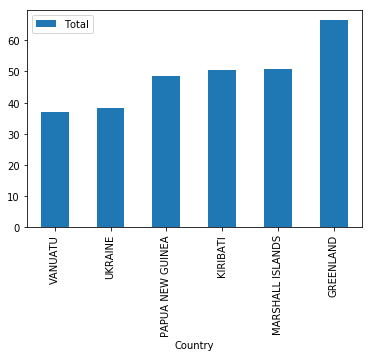

In [ ]:
rates_alto_entre_jovens_all = ihme_data_country[(ihme_data_country['Total'] > 36) 
          & (ihme_data_country['Year'] > 2015) 
          & (ihme_data_country['Sex'] == 'Both') 
          & ((ihme_data_country['Age'] == '15 to 19') | (ihme_data_country['Age'] == '20 to 24'))
          & (ihme_data_country['Cause_of_Death'] == 'Self-harm')]

rates_alto_entre_jovens_all[['Country','Total']].groupby(['Country'], as_index=True).median().sort_values(by="Total").plot.bar()

## 6. Crescimento do suícidio por faixa etária 

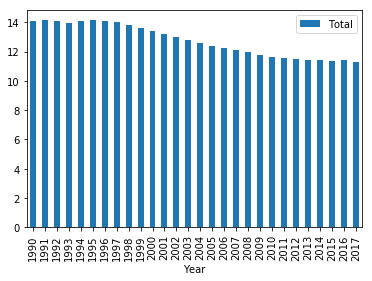

In [ ]:
paises_maior_rate_arma_fogo = ihme_data_country[ 
           (ihme_data_country['Sex'] == 'Both') 
          & (ihme_data_country['Age'] != 'All Ages')
          & (ihme_data_country['Cause_of_Death'] == 'Self-harm')
          ]

paises_maior_rate_arma_fogo[['Age','Year','Total']].groupby(['Year'], as_index=True).median().sort_values(by="Year").plot.bar()

## 7. Criar um grafico de barras com a média da taxa de suicídio por idade

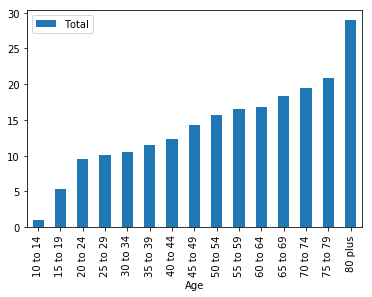

In [ ]:
paises_maior_rate_arma_fogo = ihme_data_country[ 
           (ihme_data_country['Sex'] == 'Both') 
          & (ihme_data_country['Age'] != 'All Ages')
          & (ihme_data_country['Cause_of_Death'] == 'Self-harm')
          ]

paises_maior_rate_arma_fogo[['Age','Total']].groupby(['Age'], as_index=True).median().sort_values(by="Total").plot.bar()

## 8. Países com maior número de mortes por arma de fogo (homens e mulheres)

Dentre os paises analisados, o top 6 países que detém as maiores taxas de suicídio por arma de fogo no mundo são: **Groelândia, Georgia, Estados Unidos, Uruguai, Finlândia e Suiça.**

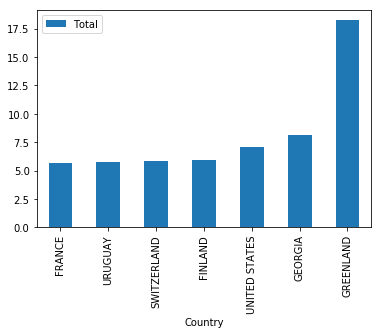

In [ ]:
paises_maior_rate_arma_fogo = ihme_data_country[ 
           (ihme_data_country['Sex'] == 'Both') 
          & (ihme_data_country['Age'] == 'All Ages')
          & (ihme_data_country['Cause_of_Death'] == 'Self-harm by firearm')
          & (ihme_data_country['Total'] > 5)
          ]

paises_maior_rate_arma_fogo[['Country','Total']].groupby(['Country'], as_index=True).median().sort_values(by="Total").plot.bar()

## 9. Criar um gráfico de dispersão ref. a dados de clima anuais

Total de Países com valor médio de temperatura:  195
Faltam:  0


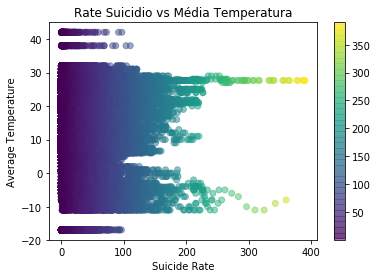

In [ ]:
print('Total de Países com valor médio de temperatura: ',ihme_data_country[ihme_data_country['avg_temp'].notnull()].Country.unique().size)
print('Faltam: ',ihme_data_country[ihme_data_country['avg_temp'].isnull()].Country.unique().size)

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

#countries_data_quality

scatter_plot = plt.scatter(ihme_data_country['Total'], ihme_data_country['avg_temp'], alpha=0.5,
                           c=ihme_data_country['Total'], cmap='viridis')
plt.colorbar()  # show color scale
plt.xlabel("Suicide Rate")
plt.ylabel("Average Temperature");
plt.title('Rate Suicidio vs Média Temperatura')
plt.autoscale()

plt.show()

Cidades com valor médio de temperatura  ['INDONESIA' 'UNITED STATES' 'JAPAN' 'MEXICO' 'BRAZIL' 'UNITED KINGDOM'
 'SWEDEN']
Cidades com valor médio de temperatura  45
Cidades sem valor médio de temperatura  166


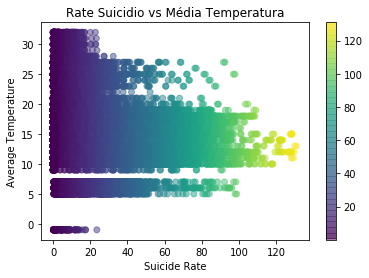

In [ ]:
print('Cidades com valor médio de temperatura ',ihme_data_city[ihme_data_city['City'].notnull()].Country.unique())
print('Cidades com valor médio de temperatura ',ihme_data_city[ihme_data_city['avg_temp'].notnull()].City.unique().size)
print('Cidades sem valor médio de temperatura ',ihme_data_city[ihme_data_city['avg_temp'].isnull()].City.unique().size)

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

scatter_plot = plt.scatter(ihme_data_city['Total'], ihme_data_city['avg_temp'], alpha=0.5,
                           c=ihme_data_city['Total'], cmap='viridis')
plt.colorbar()  # show color scale
plt.xlabel("Suicide Rate")
plt.ylabel("Average Temperature");
plt.title('Rate Suicidio vs Média Temperatura')
plt.autoscale()

plt.show()

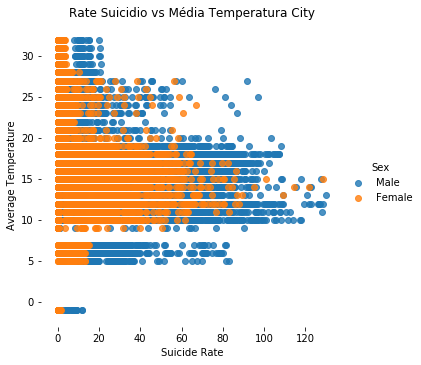

In [ ]:
df = ihme_data_city[(ihme_data_city['Age'] != 'All Ages')
                       & (ihme_data_city['Sex'] != 'Both')
                       & (ihme_data_city['Cause_of_Death'] != 'Self-harm')
                      ]
 
sns.lmplot( x="Total", y="avg_temp", data=df, fit_reg=False, hue='Sex',line_kws={"color":"r","alpha":0.7,"lw":5})
 
plt.xlabel("Suicide Rate")
plt.ylabel("Average Temperature");
plt.title('Rate Suicidio vs Média Temperatura City')
sns.despine(left=True, bottom=True)